In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data

df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [5]:
# some inspection

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [6]:
# separate columns in terms of data type

unique_vars = ['mobile_number', 'circle_id']

date_vars = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
             'last_date_of_month_9', 'date_of_last_rech_6','date_of_last_rech_7',
             'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6',
             'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

cat_vars =  ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
             'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

num_vars = [var for var in df.columns if var not in unique_vars+date_vars+cat_vars]

print("No. of id vars:", len(unique_vars))
print("No. of date vars:", len(date_vars))
print("No. of cat vars:", len(cat_vars))
print("No. of numeric vars:", len(num_vars))

No. of id vars: 2
No. of date vars: 12
No. of cat vars: 8
No. of numeric vars: 204


In [7]:
# let's take a look at the percentage of missing values
df.isnull().sum()*100 / len(df)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [8]:
# some recharge columns have minimum value of 1 while some don't

recharge_vars = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                 ]

df[recharge_vars].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,126.393392,126.729459,125.717301,124.94144,192.600982,200.981292,197.526489,192.734315
std,2.789128,3.031593,3.074987,2.516339,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,108.477235,109.765267,109.437851,111.36376,192.646318,196.791224,191.301305,188.400286
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.500000,0.500000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,25.000000,25.000000,25.000000,25.00000,82.000000,92.000000,87.000000,69.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,145.000000,145.000000,145.000000,145.00000,154.000000,154.000000,154.000000,164.000000
75%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,177.000000,177.000000,179.000000,179.00000,252.000000,252.000000,252.000000,252.000000
max,61.000000,54.000000,60.000000,84.000000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,1555.000000,1555.000000,1555.000000,1555.00000,7546.000000,4365.000000,4076.000000,4061.000000


In [9]:
df.loc[df['total_rech_data_6'].isnull() & df['date_of_last_rech_data_6'].isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN


If a recharge column has a missing value, it most probably will mean that there was no recharge done. In this case we can impute the missing values with 0.

In [10]:
# create a list of recharge columns where we will impute missing values with zeroes

vars_for_zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
                        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
                        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [11]:
df[vars_for_zero_impute] = df[vars_for_zero_impute].fillna(0)

In [12]:
df[vars_for_zero_impute].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,0.619726,0.681837,0.698517,0.632806,48.445409,51.393440,52.027022,49.961089,31.792048,32.406314,33.113011,32.387644
std,1.760541,1.924382,1.963417,1.669040,127.743863,132.629365,131.182609,127.804280,77.248778,78.342435,78.872739,78.818696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,8.250000,17.000000,23.000000,17.000000,8.000000,14.000000,17.000000,17.000000
max,61.000000,54.000000,60.000000,84.000000,7546.000000,4365.000000,4076.000000,4061.000000,1555.000000,1555.000000,1555.000000,1555.000000


We will drop the id columns and the date columns as they will not be that useful in modelling.

In [13]:
# drop id and date columns

df = df.drop(unique_vars + date_vars, axis=1)
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (99999, 212)


For categorical columns, we'll replace the missing values with -1 taking it as a separate category.

In [14]:
# replace missing values with '-1' in categorical columns

df[cat_vars] = df[cat_vars].fillna(-1)

We will drop all the columns with more than 70% missing values.

In [15]:
n_cols = len(df.columns)
thresh = 70

cols_to_keep = list(df.apply(lambda col: True if col.isnull().sum()*100/len(df) < thresh else False))

In [16]:
df = df.loc[:, cols_to_keep]

print(f"{n_cols-len(df.columns)} columns had more than 70% missing values and hence were dropped.")

16 columns had more than 70% missing values and hence were dropped.


In [17]:
df.shape

(99999, 196)

In [18]:
# let's take a look at the percentage of missing values
df.isnull().sum()*100 / len(df)

loc_og_t2o_mou        1.018010
std_og_t2o_mou        1.018010
loc_ic_t2o_mou        1.018010
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t

Next, we will use Iterative Imputation method to impute the remaining missing values.

In [19]:
cols = df.columns
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [20]:
import time
start = time.time()
imputer = IterativeImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df))

print("Time taken to impute:", time.time()-start)

Time taken to impute: 4462.534300327301


In [21]:
df_imp.columns = cols

In [22]:
df_imp.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0.0,0.0,0.0,197.385,214.816,213.803,21.100,-94.988987,-82.28771,0.00,-107.655961,143.912389,133.526023,0.00,113.53956,28.591496,12.000885,0.00,8.079336,33.25979,12.322153,0.00,1.477327,-99.926994,-117.338355,0.00,-120.137744,93.338997,91.388877,0.00,90.474676,3.747556,3.795375,0.00,3.642963,2.461638,-2.528936,0.00,-0.115195,-2.926929,-22.158241,0.00,-26.0194,30.611771,32.887615,0.00,34.002593,87.335096,90.805191,0.00,86.280474,1.103581,1.137374,0.00,1.055,0.0,0.0,0.0,0.0,119.038988,124.842633,0.00,121.329189,-120.381125,-107.696858,0.0,-99.742518,3.910416,4.973349,0.00,4.403572,0.442932,0.047841,0.0,0.04965,0.00,0.00,0.00,0.00,-58.90456,-63.902087,0.16,-58.729555,107.474509,107.123902,4.13,106.147985,12.085841,12.596819,1.15,12.177499,60.578466,55.7834,5.44,59.590282,-23.050837,-23.205303,0.00,-22.249928,20.723155,21.653532,0.00,19.619115,2.154816,2.218638,0.00,2.174657,0.0,0.0,0.0,0.0,-0.178333,0.665529,0.00,-0.455918,0.00,0.00,5.44,0.00,-67.599382,-64.485397,0.0,-68.000148,7.070499,7.405784,0.0,8.014818,0.853629,1.01204,0.0,1.017224,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,2

In [24]:
print(df_imp.isnull().sum()*100/len(df_imp))

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [25]:
# calculate the total data recharge amount for month 6 & 7 using --> number of recharges * average recharge amount

df_imp['total_data_rech_6'] = df_imp['total_rech_data_6'] * df_imp['av_rech_amt_data_6']
df_imp['total_data_rech_7'] = df_imp['total_rech_data_7'] * df_imp['av_rech_amt_data_7']

In [26]:
# calculate total recharge amount for month 6 & 7 using --> call recharge amount + data recharge amount

df_imp['amt_data_6'] = df_imp['total_rech_amt_6'] + df_imp['total_data_rech_6']
df_imp['amt_data_7'] = df_imp['total_rech_amt_7'] + df_imp['total_data_rech_7']

In [27]:
# calculate average recharge done by customer for month 6 & 7

df_imp['av_amt_data_6_7'] = (df_imp['amt_data_6']+df_imp['amt_data_7'])/2

We will now filter the dataset to only get the High-Value customers.

In [28]:
# look at the 70th percentile recharge amount

print(f"Recharge amount at 70th percentile: {df_imp['av_amt_data_6_7'].quantile(0.7)}")

Recharge amount at 70th percentile: 478.0


In [29]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

df_hvc = df_imp.loc[df_imp['av_amt_data_6_7'] >= df_imp['av_amt_data_6_7'].quantile(0.7), :]
df_hvc = df_hvc.reset_index(drop=True)
df_hvc.shape

(30001, 201)

In [30]:
# delete variables created to filter high-value customers

df_hvc = df_hvc.drop(columns=['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'])
df_hvc.shape

(30001, 196)

In [31]:
# calculate total incoming and outgoing minutes of usage
df_hvc['total_calls_mou_9'] = df_hvc['total_ic_mou_9'] + df_hvc['total_og_mou_9']

# calculate 2g and 3g data consumption
df_hvc['total_internet_mb_9'] =  df_hvc['vol_2g_mb_9'] + df_hvc['vol_3g_mb_9']

In [32]:
# create churn variable: those who have not used either calls or internet in month 9 are customers who have churned
# 0 for no churn, 
# 1 for churn

df_hvc['churn'] = df_hvc.apply(lambda row: 1 if (row['total_calls_mou_9'] == 0 and row['total_internet_mb_9'] == 0) else 0, axis=1)

In [33]:
# delete derived variables

df_hvc = df_hvc.drop(columns=['total_calls_mou_9', 'total_internet_mb_9'])

In [34]:
# change data type to category
df_hvc['churn'] = df_hvc['churn'].astype('category')

# print churn ratio
print("Churn Ratio:")
print(df_hvc['churn'].value_counts()*100/len(df_hvc))

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


We will derive some new variables by taking the difference of metrics from month 8 and month 6 & 7

In [35]:
df_hvc['arpu_diff'] = df_hvc['arpu_8']- ((df_hvc['arpu_6'] + df_hvc['arpu_7'])/2)
df_hvc['onnet_mou_diff'] = df_hvc['onnet_mou_8'] - ((df_hvc['onnet_mou_6'] + df_hvc['onnet_mou_7'])/2)
df_hvc['offnet_mou_diff'] = df_hvc['offnet_mou_8'] - ((df_hvc['offnet_mou_6'] + df_hvc['offnet_mou_7'])/2)
df_hvc['roam_ic_mou_diff'] = df_hvc['roam_ic_mou_8'] - ((df_hvc['roam_ic_mou_6'] + df_hvc['roam_ic_mou_7'])/2)
df_hvc['roam_og_mou_diff'] = df_hvc['roam_og_mou_8'] - ((df_hvc['roam_og_mou_6'] + df_hvc['roam_og_mou_7'])/2)
df_hvc['loc_og_mou_diff'] = df_hvc['loc_og_mou_8'] - ((df_hvc['loc_og_mou_6'] + df_hvc['loc_og_mou_7'])/2)
df_hvc['std_og_mou_diff'] = df_hvc['std_og_mou_8'] - ((df_hvc['std_og_mou_6'] + df_hvc['std_og_mou_7'])/2)
df_hvc['isd_og_mou_diff'] = df_hvc['isd_og_mou_8'] - ((df_hvc['isd_og_mou_6'] + df_hvc['isd_og_mou_7'])/2)
df_hvc['spl_og_mou_diff'] = df_hvc['spl_og_mou_8'] - ((df_hvc['spl_og_mou_6'] + df_hvc['spl_og_mou_7'])/2)
df_hvc['total_og_mou_diff'] = df_hvc['total_og_mou_8'] - ((df_hvc['total_og_mou_6'] + df_hvc['total_og_mou_7'])/2)
df_hvc['loc_ic_mou_diff'] = df_hvc['loc_ic_mou_8'] - ((df_hvc['loc_ic_mou_6'] + df_hvc['loc_ic_mou_7'])/2)
df_hvc['std_ic_mou_diff'] = df_hvc['std_ic_mou_8'] - ((df_hvc['std_ic_mou_6'] + df_hvc['std_ic_mou_7'])/2)
df_hvc['isd_ic_mou_diff'] = df_hvc['isd_ic_mou_8'] - ((df_hvc['isd_ic_mou_6'] + df_hvc['isd_ic_mou_7'])/2)
df_hvc['spl_ic_mou_diff'] = df_hvc['spl_ic_mou_8'] - ((df_hvc['spl_ic_mou_6'] + df_hvc['spl_ic_mou_7'])/2)
df_hvc['total_ic_mou_diff'] = df_hvc['total_ic_mou_8'] - ((df_hvc['total_ic_mou_6'] + df_hvc['total_ic_mou_7'])/2)
df_hvc['total_rech_num_diff'] = df_hvc['total_rech_num_8'] - ((df_hvc['total_rech_num_6'] + df_hvc['total_rech_num_7'])/2)
df_hvc['total_rech_amt_diff'] = df_hvc['total_rech_amt_8'] - ((df_hvc['total_rech_amt_6'] + df_hvc['total_rech_amt_7'])/2)
df_hvc['max_rech_amt_diff'] = df_hvc['max_rech_amt_8'] - ((df_hvc['max_rech_amt_6'] + df_hvc['max_rech_amt_7'])/2)
df_hvc['total_rech_data_diff'] = df_hvc['total_rech_data_8'] - ((df_hvc['total_rech_data_6'] + df_hvc['total_rech_data_7'])/2)
df_hvc['max_rech_data_diff'] = df_hvc['max_rech_data_8'] - ((df_hvc['max_rech_data_6'] + df_hvc['max_rech_data_7'])/2)
df_hvc['av_rech_amt_data_diff'] = df_hvc['av_rech_amt_data_8'] - ((df_hvc['av_rech_amt_data_6'] + df_hvc['av_rech_amt_data_7'])/2)
df_hvc['vol_2g_mb_diff'] = df_hvc['vol_2g_mb_8'] - ((df_hvc['vol_2g_mb_6'] + df_hvc['vol_2g_mb_7'])/2)
df_hvc['vol_3g_mb_diff'] = df_hvc['vol_3g_mb_8'] - ((df_hvc['vol_3g_mb_6'] + df_hvc['vol_3g_mb_7'])/2)

In [36]:
# let's look at summary of one of the difference variables

df_hvc['max_rech_amt_diff'].describe()

count    30001.000000
mean       -10.598813
std        136.893018
min      -3010.000000
25%        -33.000000
50%          0.000000
75%         25.000000
max       3949.000000
Name: max_rech_amt_diff, dtype: float64

We will drop the columns that have information for the month 9 as that is the month for which we are predicting the churn.

In [37]:
# drop all the columns or month 9

col_9 = [var for var in df_hvc.columns if '9' in var]
df_hvc = df_hvc.drop(columns=col_9)
df_hvc.shape

(30001, 173)

In [38]:
# update the categorical and numeric variables

cat_vars = [var for var in cat_vars if var not in col_9]
cat_vars.append('churn')
num_vars = [var for var in df_hvc.columns if var not in cat_vars]

In [39]:
# change columns types

df_hvc[num_vars] = df_hvc[num_vars].apply(pd.to_numeric)
df_hvc[cat_vars] = df_hvc[cat_vars].apply(lambda var: var.astype("category"), axis=0)

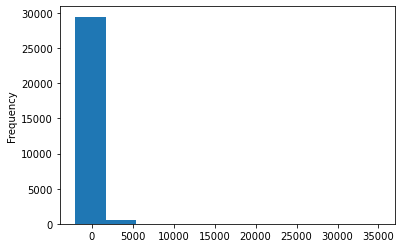

In [40]:
df_hvc['arpu_7'].plot(kind='hist');

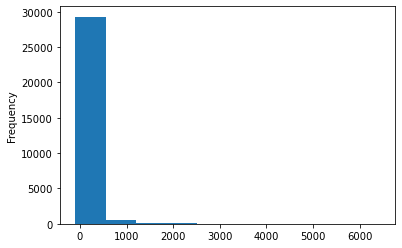

In [41]:
df_hvc['loc_og_t2t_mou_6'].plot(kind='hist');

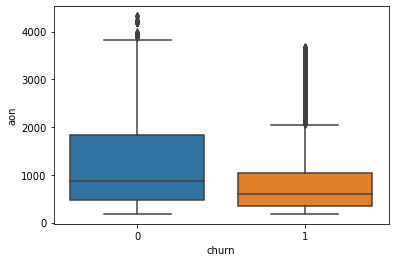

In [42]:
sns.boxplot(x='churn', y='aon', data=df_hvc);

We will clip the outliers to 3 standard deviations.

In [43]:
def outlier_clip(df, k=3):
    max_limit = df.mean() + k*df.std()
    min_limit = df.mean() - k*df.std()
    df[df<min_limit] = min_limit
    df[df>max_limit] = max_limit
    return df

In [44]:
# cap outliers in the numeric columns

df_hvc[num_vars] = df_hvc[num_vars].apply(outlier_clip, axis=0)

In [45]:
# import required libraries for model building

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [46]:
df_hvc['churn'] = pd.to_numeric(df_hvc['churn'])

In [47]:
# divide data into train and test

X = df_hvc.drop('churn', axis=1)
y = df_hvc['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [48]:
# # print shapes of train and test sets

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(22500, 172) (22500,) (7501, 172) (7501,)


We will aggregate the categorical columns by the mean churn

In [49]:
train = pd.concat([X_train, y_train], axis=1)

# aggregate the categorical variables
print(train.groupby('night_pck_user_6')['churn'].mean())
print(train.groupby('night_pck_user_7')['churn'].mean())
print(train.groupby('night_pck_user_8')['churn'].mean())
print(train.groupby('fb_user_6')['churn'].mean())
print(train.groupby('fb_user_7')['churn'].mean())
print(train.groupby('fb_user_8')['churn'].mean())

night_pck_user_6
-1.0    0.097239
 0.0    0.067838
 1.0    0.100610
Name: churn, dtype: float64
night_pck_user_7
-1.0    0.113012
 0.0    0.056886
 1.0    0.068027
Name: churn, dtype: float64
night_pck_user_8
-1.0    0.140734
 0.0    0.028767
 1.0    0.031496
Name: churn, dtype: float64
fb_user_6
-1.0    0.097239
 0.0    0.077004
 1.0    0.068017
Name: churn, dtype: float64
fb_user_7
-1.0    0.113012
 0.0    0.068560
 1.0    0.056148
Name: churn, dtype: float64
fb_user_8
-1.0    0.140734
 0.0    0.061856
 1.0    0.024923
Name: churn, dtype: float64


In [50]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.097239, 0: 0.067838, 1: 0.100610},
           'night_pck_user_7' : {-1: 0.113012, 0: 0.056886, 1: 0.068027},
           'night_pck_user_8' : {-1: 0.140734, 0: 0.028767, 1: 0.031496},
           'fb_user_6'        : {-1: 0.097239, 0: 0.077004, 1: 0.068017},
           'fb_user_7'        : {-1: 0.113012, 0: 0.068560, 1: 0.056148},
           'fb_user_8'        : {-1: 0.140734, 0: 0.061856, 1: 0.024923}}

X_train.replace(mapping, inplace=True)
X_test.replace(mapping, inplace=True)

In [51]:
# check data type of categorical columns - make sure they are numeric

X_train[[var for var in cat_vars if var not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 7066 to 9190
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


In [52]:
# make a sklearn pipeline to perform scaling and PCA on the data.

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(random_state=0))])

In [53]:
# fit the pipeline to the training data

train_pca = pca_pipeline.fit_transform(X_train)

In [56]:
# extract pca components
pca = pca_pipeline.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca_pipeline.named_steps['pca'].explained_variance_ratio_.cumsum(),4)*100))

0       11.51
1       21.03
2       26.91
3       31.94
4       36.03
5       39.68
6       42.45
7       45.08
8       47.40
9       49.62
10      51.67
11      53.60
12      55.43
13      57.17
14      58.86
15      60.49
16      62.08
17      63.51
18      64.84
19      66.15
20      67.43
21      68.62
22      69.77
23      70.85
24      71.88
25      72.86
26      73.81
27      74.76
28      75.66
29      76.54
30      77.36
31      78.18
32      78.96
33      79.73
34      80.47
35      81.20
36      81.90
37      82.57
38      83.22
39      83.78
40      84.33
41      84.87
42      85.41
43      85.92
44      86.42
45      86.91
46      87.37
47      87.82
48      88.25
49      88.64
50      89.03
51      89.40
52      89.76
53      90.11
54      90.44
55      90.78
56      91.11
57      91.43
58      91.74
59      92.04
60      92.34
61      92.62
62      92.89
63      93.16
64      93.42
65      93.68
66      93.92
67      94.15
68      94.37
69      94.59
70      94.80
71    

60 components are able to capture around 93% of variance in the data. That is pretty good amount of reduction in dimensions.

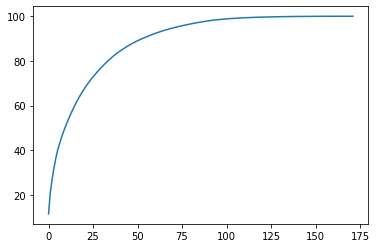

In [57]:
# plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.plot(cumulative_variance);

In [58]:
# make a sklearn pipeline to perform scaling and PCA on the data 
# followed by logistic regression.

n_components = 60
pipe = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=n_components, random_state=0)),
         ("logistic", LogisticRegression(class_weight='balanced', random_state=0))]
logreg = Pipeline(pipe)

In [59]:
# fit model
logreg.fit(X_train, y_train)

# check score on train data
logreg.score(X_train, y_train)

0.8434222222222222

In [62]:
# predict churn on test data
y_pred = logreg.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# check area under curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

[[5873 1018]
 [ 109  501]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      6891
           1       0.33      0.82      0.47       610

    accuracy                           0.85      7501
   macro avg       0.66      0.84      0.69      7501
weighted avg       0.93      0.85      0.88      7501

AUC:    	 0.91


We get a decent recall value for normal Logistic Regression model. Let;s now try out using class weight to train the model.

In [63]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [64]:
# state the weight that each class gets
class_weight = {
    0: 0.1, 
    1: 0.9
}

# build a sklearn pipeline
pipe = [('scaler', StandardScaler()), 
        ('pca', PCA(random_state=0)), 
        ('logistic', LogisticRegression(class_weight=class_weight, random_state=0))]

logreg_fine = Pipeline(pipe)

# set the parameters over which the grid search will occur
params = {
    'pca__n_components': [60, 80], 
    'logistic__C': [0.1, 0.5, 1, 2, 3, 10], 
    'logistic__penalty': ['l1', 'l2']
}

# set the folds for cross-validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# set the grid search
model = GridSearchCV(estimator=logreg_fine, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [65]:
# fit the model

model.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   47.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None, random_state=0,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           clas...
                                                           multi_class

In [66]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hparameters: ", model.best_params_)

Best AUC:  0.9041032592090568
Best hparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [67]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

[[6040  851]
 [ 130  480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92      6891
           1       0.36      0.79      0.49       610

    accuracy                           0.87      7501
   macro avg       0.67      0.83      0.71      7501
weighted avg       0.93      0.87      0.89      7501

AUC: 0.91


The performance actually decreased after applying class weights.

Let's now build a Random Forest classifier and see if that improves the performance.

In [68]:
# random forest - the class weight is used to handle class imbalance
rf = RandomForestClassifier(class_weight=class_weight, n_jobs=-1, random_state=0)

# set the parameter space
params = {
    "criterion": ['gini', 'entropy'], 
    "max_features": ['auto', 0.4]
}

# create 5 folds for cross validation
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# set the grid search
rf_model = GridSearchCV(estimator=rf, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [69]:
# fit the random forest model

rf_model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  3.2min remaining:   21.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

In [70]:
# print best hyperparameters

print("Best AUC: ", rf_model.best_score_)
print("Best parameters: ", rf_model.best_params_)

Best AUC:  0.929095151966291
Best parameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [71]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# get the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

[[6804   87]
 [ 314  296]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      6891
           1       0.77      0.49      0.60       610

    accuracy                           0.95      7501
   macro avg       0.86      0.74      0.78      7501
weighted avg       0.94      0.95      0.94      7501

AUC: 0.91


The performance of the RF model is worse than the logistic regression model.

In [72]:
# run a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print("Max features:", max_features)

rf_model_max = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight=class_weight, oob_score=True, random_state=0, verbose=1)

Max features: 13


In [73]:
rf_model_max.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=13, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=0, verbose=1, warm_start=False)

In [74]:
rf_model_max.oob_score_

0.9452444444444444

In [75]:
# predict churn on test data
y_pred = rf_model_max.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


[[6822   69]
 [ 342  268]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      6891
           1       0.80      0.44      0.57       610

    accuracy                           0.95      7501
   macro avg       0.87      0.71      0.77      7501
weighted avg       0.94      0.95      0.94      7501

AUC: 0.94


In [76]:
# predictors
features = df_hvc.drop('churn', axis=1).columns

# feature_importance
importance = rf_model_max.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


,variables,importance_percentage
0,total_ic_mou_8,5.753363
1,roam_og_mou_8,3.969417
2,loc_og_mou_8,3.701588
3,roam_ic_mou_8,3.218953
4,total_rech_amt_8,2.770439
5,loc_ic_t2t_mou_8,2.694951
6,loc_ic_mou_8,2.518581
7,total_rech_amt_diff,2.464287
8,loc_og_t2t_mou_8,2.446756
9,arpu_8,2.374068


We'll plot the feature importance of top 30 features for a random forest model.

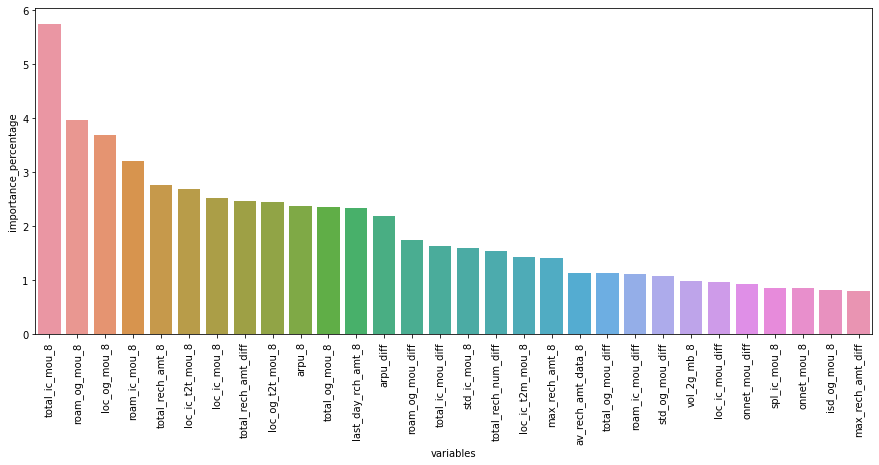

In [82]:
top30 = feature_importance[:30]
plt.figure(figsize=(15, 6))
sns.barplot(x='variables', y='importance_percentage', data=top30)
plt.xticks(rotation=90);

The variables that we derived from the difference of metrics from month 8 and month 6 and 7 are pretty important in terms of predicting churn as shown in the chart above.

### Business Insights

- The difference in the usage from the previous month is very important KPI for the business to detect churn. The should pay attention to this so they can act accordingly and reduce customer churn.
- There is a strong affect of minutes of usage on the churn. This metric can be a good indicator of the customer churn.
- Calling minuts of usage seems to be more important than the data usage for predicting the customer churn.